In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'train.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15696 entries, 0 to 15695
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          15696 non-null  object 
 1   description                                   15309 non-null  object 
 2   property_type                                 15696 non-null  object 
 3   price                                         15696 non-null  int64  
 4   neighbourhood_cleansed                        15696 non-null  object 
 5   neighbourhood_group_cleansed                  15696 non-null  object 
 6   latitude                                      15696 non-null  float64
 7   longitude                                     15696 non-null  float64
 8   host_since                                    15696 non-null  object 
 9   host_response_time                            13493 non-null 

In [4]:
print(df.head())

                                               name  \
0                 Bed-Stuy 2 Bed/2 Bath - Renovated   
1                          Victorian Flatbush Oasis   
2  Bay Ridge Metroscape: Inviting NYC Studio Living   
3       New HDTV room, 20 minutes to Manhattan #724   
4      Just What You Were Looking For! Pets Allowed   

                                         description  \
0  Welcome to Bed-Stuy, Brooklyn! Our newly renov...   
1  Lovely nonsmoking annex in Brooklyn's "secret ...   
2  This studio presents unparalleled convenience ...   
3  - Furnished room in a newly renovated apartmen...   
4  This modern property in Manhattan is just step...   

                 property_type  price neighbourhood_cleansed  \
0           Entire rental unit      4     Bedford-Stuyvesant   
1  Private room in rental unit      3               Flatbush   
2           Entire rental unit      3          Fort Hamilton   
3  Private room in rental unit      0          Crown Heights   
4           

In [5]:
# missing value proportion
missing_ratio = df.isnull().mean() * 100
print("\nmissing value ratio（%）:")
print(missing_ratio)


missing value ratio（%）:
name                                             0.000000
description                                      2.465596
property_type                                    0.000000
price                                            0.000000
neighbourhood_cleansed                           0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude                                        0.000000
host_since                                       0.000000
host_response_time                              14.035423
host_response_rate                              14.035423
host_acceptance_rate                            13.079766
host_is_superhost                                1.599134
host_listings_count                              0.000000
host_total_listings_count                        0.000000
host_verifications                               0.000000
host_has_profile_pic                           

In [6]:
print(df.describe())

              price      latitude     longitude  host_response_rate  \
count  15696.000000  15696.000000  15696.000000        13493.000000   
mean       2.465724     40.726899    -73.943147           91.383013   
std        1.709624      0.058079      0.060149           22.320590   
min        0.000000     40.500366    -74.251907            0.000000   
25%        1.000000     40.685686    -73.983133           97.000000   
50%        2.000000     40.725251    -73.952458          100.000000   
75%        4.000000     40.762314    -73.921120          100.000000   
max        5.000000     40.911390    -73.713650          100.000000   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count          13643.000000         15696.000000               15696.000000   
mean              78.579198           288.106588                 393.435143   
std               27.896484           984.327077                1205.427544   
min                0.000000             1.00

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"column_name: {col}, unique value: {df[col].nunique()}")

column_name: name, unique value: 15189
column_name: description, unique value: 12687
column_name: property_type, unique value: 59
column_name: neighbourhood_cleansed, unique value: 217
column_name: neighbourhood_group_cleansed, unique value: 5
column_name: host_since, unique value: 4037
column_name: host_response_time, unique value: 4
column_name: host_is_superhost, unique value: 2
column_name: host_verifications, unique value: 6
column_name: room_type, unique value: 4
column_name: bathrooms_text, unique value: 30
column_name: amenities, unique value: 13314
column_name: has_availability, unique value: 1
column_name: first_review, unique value: 3261
column_name: last_review, unique value: 1390
column_name: reviews, unique value: 11215


In [8]:
columns_to_drop = ['name', 'description', 'reviews', 'amenities','neighbourhood_cleansed','host_verifications','bathrooms_text']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print(df.head())

                 property_type  price neighbourhood_group_cleansed   latitude  \
0           Entire rental unit      4                     Brooklyn  40.684560   
1  Private room in rental unit      3                     Brooklyn  40.638991   
2           Entire rental unit      3                     Brooklyn  40.618810   
3  Private room in rental unit      0                     Brooklyn  40.673970   
4                Room in hotel      2                    Manhattan  40.747180   

   longitude           host_since host_response_time  host_response_rate  \
0 -73.939870  2015-05-23 00:00:00       within a day               100.0   
1 -73.965739  2023-09-14 00:00:00     within an hour               100.0   
2 -74.032380  2022-07-31 00:00:00     within an hour               100.0   
3 -73.953990  2012-08-11 00:00:00     within an hour                99.0   
4 -73.985390  2014-12-23 00:00:00     within an hour                93.0   

   host_acceptance_rate host_is_superhost  ...         f

In [9]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_since_year_diff'] = 2024 - df['host_since'].dt.year
print(df[['host_since', 'host_since_year_diff']].head())

  host_since  host_since_year_diff
0 2015-05-23                     9
1 2023-09-14                     1
2 2022-07-31                     2
3 2012-08-11                    12
4 2014-12-23                    10


In [10]:

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')


df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days
df['days_since_first_review'] = (pd.to_datetime('today') - df['first_review']).dt.days


def categorize_review_period(days):
    if days <= 365:
        return 'within 1 year'
    elif days <= 1095:
        return '1-3 years'
    else:
        return 'more than 3 years'


df['review_last_category'] = df['days_since_last_review'].apply(categorize_review_period)
df['review_first_category'] = df['days_since_first_review'].apply(categorize_review_period)


print(df[['last_review', 'days_since_last_review', 'review_last_category']].head())
print(df[['first_review', 'days_since_first_review', 'review_first_category']].head())


  last_review  days_since_last_review review_last_category
0  2024-08-10                   105.0        within 1 year
1  2024-09-02                    82.0        within 1 year
2  2024-08-17                    98.0        within 1 year
3         NaT                     NaN    more than 3 years
4         NaT                     NaN    more than 3 years
  first_review  days_since_first_review review_first_category
0   2019-04-28                   2036.0     more than 3 years
1   2024-01-13                    315.0         within 1 year
2   2024-06-27                    149.0         within 1 year
3          NaT                      NaN     more than 3 years
4          NaT                      NaN     more than 3 years


In [11]:
df.head(5)

,property_type,price,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_since_year_diff,days_since_last_review,days_since_first_review,review_last_category,review_first_category
0,Entire rental unit,4,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,100.0,100.0,True,...,5.0,5.0,4.71,4.94,0.52,9,105.0,2036.0,within 1 year,more than 3 years
1,Private room in rental unit,3,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,100.0,98.0,True,...,4.8,4.9,4.90,4.63,3.81,1,82.0,315.0,within 1 year,within 1 year
2,Entire rental unit,3,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,100.0,100.0,False,...,4.8,4.8,4.80,4.20,2.14,2,98.0,149.0,within 1 year,within 1 year
3,Private room in rental unit,0,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,99.0,23.0,False,...,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,more than 3 years,more than 3 years
4,Room in hotel,2,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,93.0,95.0,False,...,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,more than 3 years,more than 3 years


In [12]:
room_type_counts = df['room_type'].value_counts()

print(room_type_counts)

room_type
Entire home/apt    8592
Private room       6737
Hotel room          200
Shared room         167
Name: count, dtype: int64


In [13]:
neighbourhood_to_score = {
    'Manhattan': 5,
    'Brooklyn': 4,
    'Queens': 3,
    'Bronx': 2,
    'Staten Island': 1
}

df['neighbourhood_encoded'] = df['neighbourhood_group_cleansed'].map(neighbourhood_to_score)
df.head(5)

,property_type,price,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_since_year_diff,days_since_last_review,days_since_first_review,review_last_category,review_first_category,neighbourhood_encoded
0,Entire rental unit,4,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,100.0,100.0,True,...,5.0,4.71,4.94,0.52,9,105.0,2036.0,within 1 year,more than 3 years,4
1,Private room in rental unit,3,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,100.0,98.0,True,...,4.9,4.90,4.63,3.81,1,82.0,315.0,within 1 year,within 1 year,4
2,Entire rental unit,3,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,100.0,100.0,False,...,4.8,4.80,4.20,2.14,2,98.0,149.0,within 1 year,within 1 year,4
3,Private room in rental unit,0,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,99.0,23.0,False,...,NaN,NaN,NaN,NaN,12,NaN,NaN,more than 3 years,more than 3 years,4
4,Room in hotel,2,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,93.0,95.0,False,...,NaN,NaN,NaN,NaN,10,NaN,NaN,more than 3 years,more than 3 years,5


In [14]:
response_counts = df['host_response_time'].value_counts()
last_counts = df['review_last_category'].value_counts()
first_counts = df['review_first_category'].value_counts()

print(response_counts)
print(last_counts)
print(first_counts)

host_response_time
within an hour        8367
within a few hours    2908
within a day          1472
a few days or more     746
Name: count, dtype: int64
review_last_category
within 1 year        6972
more than 3 years    5204
1-3 years            3520
Name: count, dtype: int64
review_first_category
more than 3 years    9528
1-3 years            4397
within 1 year        1771
Name: count, dtype: int64


In [15]:
response_to_score = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1,
}

df['response_encoded'] = df['host_response_time'].map(response_to_score)

last_to_score = {
    'within 1 year': 3,
    '1-3 years': 2,
    'more than 3 years': 1,
}
df['last_encoded'] = df['review_last_category'].map(last_to_score)

df_1 = pd.get_dummies(df, columns=['review_first_category', 'room_type'], 
                            prefix=['first_review', 'room_type'])



df_1.head(5)

,property_type,price,neighbourhood_group_cleansed,latitude,longitude,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,neighbourhood_encoded,response_encoded,last_encoded,first_review_1-3 years,first_review_more than 3 years,first_review_within 1 year,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Entire rental unit,4,Brooklyn,40.684560,-73.939870,2015-05-23,within a day,100.0,100.0,True,...,4,2.0,3,False,True,False,True,False,False,False
1,Private room in rental unit,3,Brooklyn,40.638991,-73.965739,2023-09-14,within an hour,100.0,98.0,True,...,4,4.0,3,False,False,True,False,False,True,False
2,Entire rental unit,3,Brooklyn,40.618810,-74.032380,2022-07-31,within an hour,100.0,100.0,False,...,4,4.0,3,False,False,True,True,False,False,False
3,Private room in rental unit,0,Brooklyn,40.673970,-73.953990,2012-08-11,within an hour,99.0,23.0,False,...,4,4.0,1,False,True,False,False,False,True,False
4,Room in hotel,2,Manhattan,40.747180,-73.985390,2014-12-23,within an hour,93.0,95.0,False,...,5,4.0,1,False,True,False,False,True,False,False


In [16]:
df = df_1.drop(columns=['property_type', 'neighbourhood_group_cleansed','host_since','host_response_time','first_review','last_review','review_last_category'])

all_features = df.columns
print(all_features)

Index(['price', 'latitude', 'longitude', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'instant_bookable', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_since_year_diff',
       'days_


missing value stats:
price                                              0
latitude                                           0
longitude                                          0
host_response_rate                              2203
host_acceptance_rate                            2053
host_is_superhost                                251
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
host_identity_verified                             0
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
accommodates                                       0
bathrooms                                          3
bedrooms                                          34
beds                                              84
has_availability        

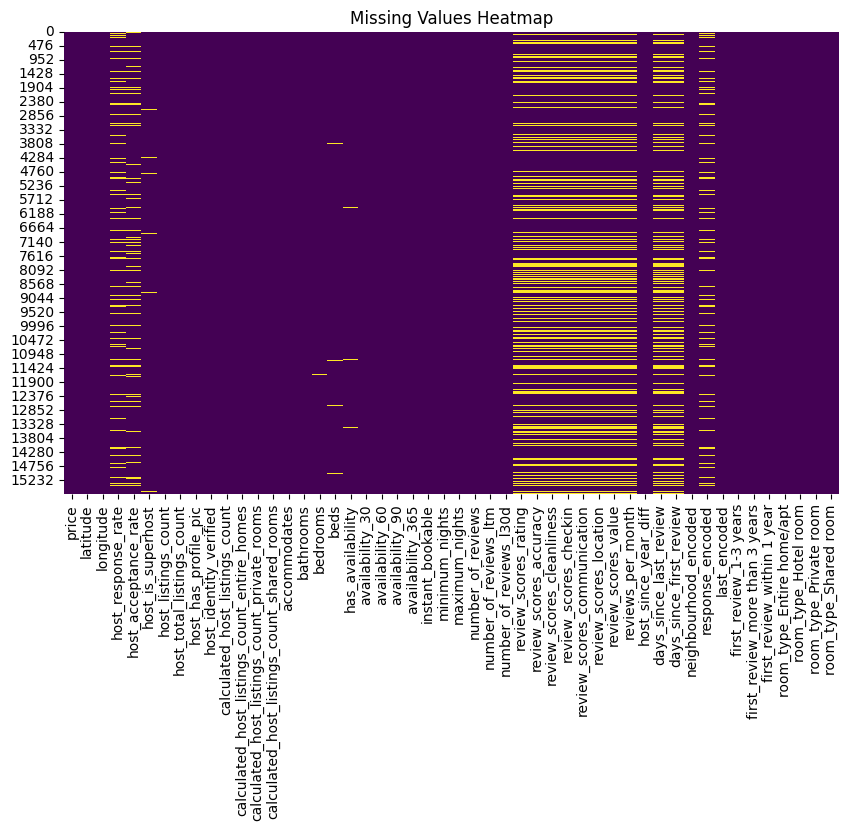

In [17]:
# check missing value
print("\nmissing value stats:")
print(df.isnull().sum())

# visualization

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [18]:
# missing value proportion
missing_ratio = df.isnull().mean() * 100
print("\nmissing value ratio（%）:")
print(missing_ratio)



missing value ratio（%）:
price                                            0.000000
latitude                                         0.000000
longitude                                        0.000000
host_response_rate                              14.035423
host_acceptance_rate                            13.079766
host_is_superhost                                1.599134
host_listings_count                              0.000000
host_total_listings_count                        0.000000
host_has_profile_pic                             0.000000
host_identity_verified                           0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
accommodates                                     0.000000
bathrooms                                        0.019113
bedrooms                                       

In [19]:
# 找到缺失值比例大于 90% 的列并打印这些列名
columns_with_high_missing = missing_ratio[missing_ratio > 0.9].index

if len(columns_with_high_missing) > 0:
    print("Columns with missing value ratio > 90%:")
    print(columns_with_high_missing)
else:
    print("No columns have missing value ratio greater than 90%.")


columns_with_high_missing = missing_ratio[missing_ratio > 0.7].index

if len(columns_with_high_missing) > 0:
    print("Columns with missing value ratio > 70%:")
    print(columns_with_high_missing)
else:
    print("No columns have missing value ratio greater than 70%.")

Columns with missing value ratio > 90%:
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'days_since_last_review',
       'days_since_first_review', 'response_encoded'],
      dtype='object')
Columns with missing value ratio > 70%:
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'has_availability', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'days_since_last_review',
       'days_since_first_review', 'response_encoded'],
      dtype='object')


In [20]:
df = df.drop(columns=[ 'has_availability','reviews_per_month','days_since_last_review','days_since_first_review', 'response_encoded'])

In [22]:
# missing value proportion
missing_ratio = df.isnull().mean() * 100
print("\nmissing value ratio（%）:")
print(missing_ratio)



missing value ratio（%）:
price                                           0.000000
latitude                                        0.000000
longitude                                       0.000000
host_response_rate                              0.000000
host_acceptance_rate                            0.000000
host_is_superhost                               1.599134
host_listings_count                             0.000000
host_total_listings_count                       0.000000
host_has_profile_pic                            0.000000
host_identity_verified                          0.000000
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
accommodates                                    0.000000
bathrooms                                       0.019113
bedrooms                                        0.216616
beds  

In [23]:
missing_count = df.isnull().sum()
print("Missing values count in each column:")
missing_count

Missing values count in each column:


price                                             0
latitude                                          0
longitude                                         0
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                               251
host_listings_count                               0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
accommodates                                      0
bathrooms                                         3
bedrooms                                         34
beds                                             84
availability_30                                   0
availability

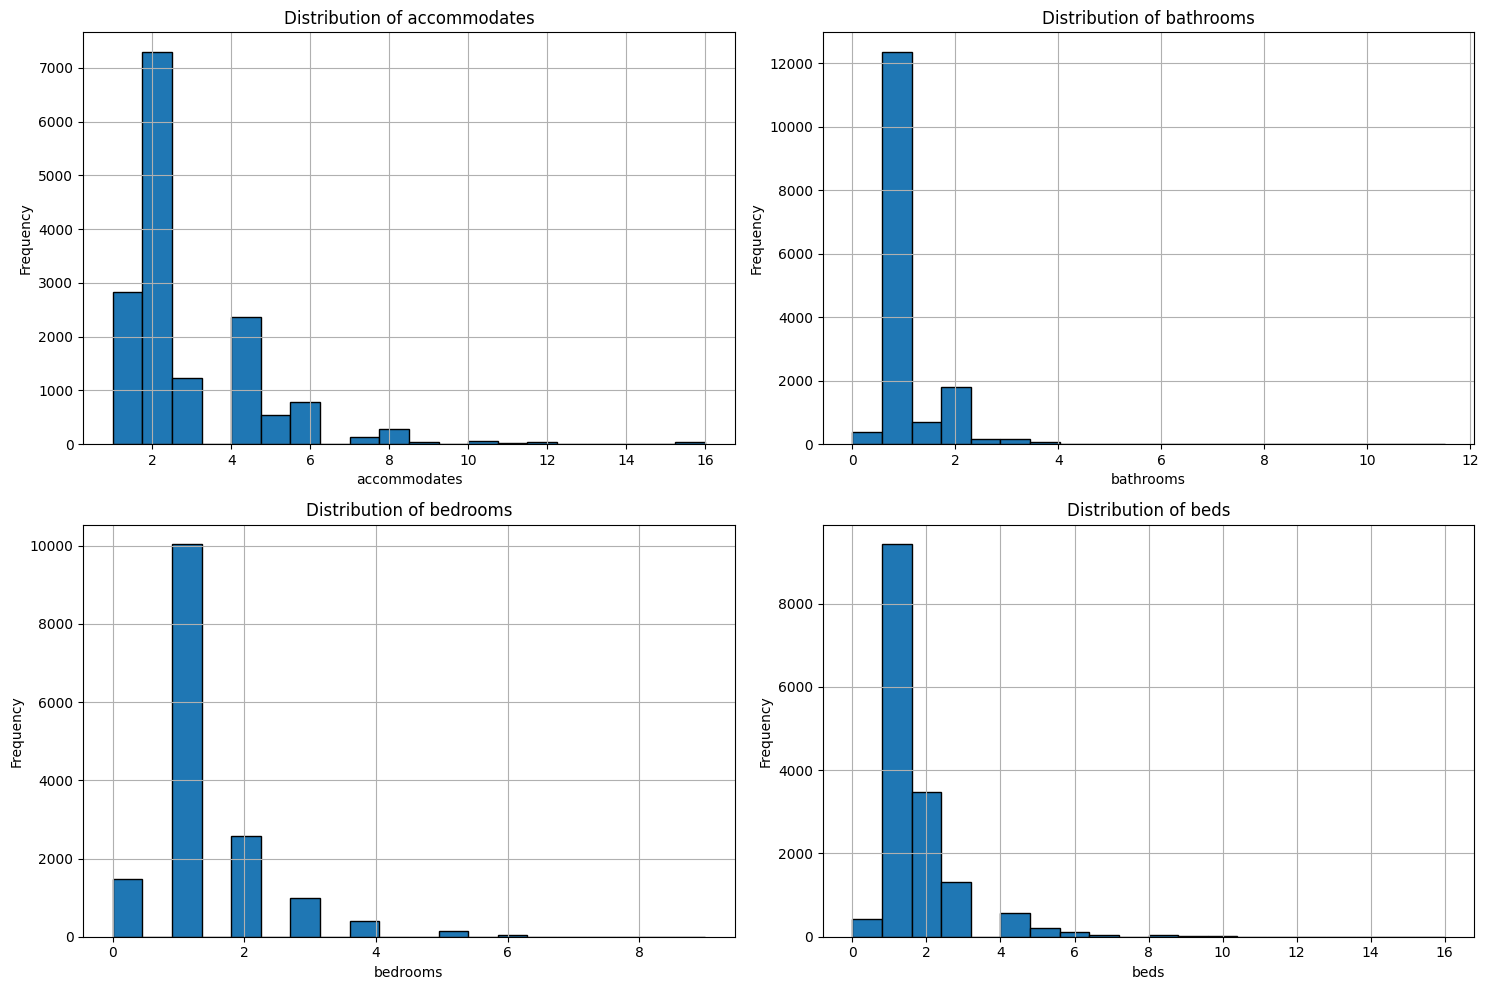

In [25]:
import matplotlib.pyplot as plt

variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    df[var].hist(bins=20, edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()


In [27]:
missing_variables = df.columns[df.isnull().any()]
print("Variables with missing values:")
print(missing_variables)

Variables with missing values:
Index([], dtype='object')


# feature importance

Feature Importance:
                                         Feature  Importance
42                        room_type_Private room    0.266504
22                                minimum_nights    0.130151
1                                      longitude    0.083623
5                            host_listings_count    0.050381
0                                       latitude    0.049821
13                                  accommodates    0.046973
11  calculated_host_listings_count_private_rooms    0.028074
40                     room_type_Entire home/apt    0.027733
14                                     bathrooms    0.025866
15                                      bedrooms    0.021874
17                               availability_30    0.020384
6                      host_total_listings_count    0.020270
19                               availability_90    0.017434
18                               availability_60    0.016413
20                              availability_365    0.015812
3   

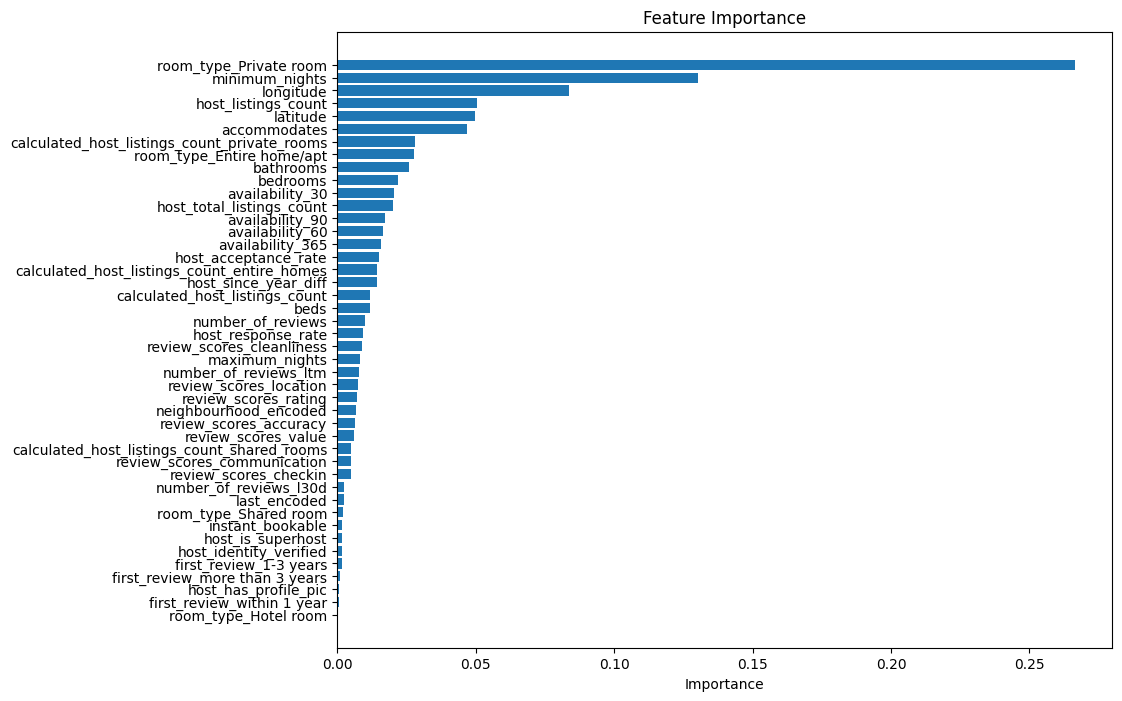

In [28]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop(columns=['price'])
y = df['price']


model = RandomForestRegressor(n_estimators=100, random_state=100)
model.fit(X, y)


feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print("Feature Importance:")
print(importance_df)


plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


In [ ]:
from catboost import CatBoostClassifier

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = df(X, y, test_size=0.2, random_state=1005, stratify=y)

model_cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10, verbose=0)
model_cb.fit(X_train, y_train)

y_pred = model_cb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRoot Mean Squared Error (RMSE):", rmse)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(columns=['price'])
y = df['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)


param_grid = {
    'n_estimators': [100, 150, 200],     
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [4, 5, 6]               
}


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=1005)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



file_path_1 = '/home/users/ys468/ml kaggle/cs-671-fall-2024-final-project/test.csv'
df_t = pd.read_csv(file_path_1)

categorical_columns = df_t.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"column_name: {col}, unique value: {df_t[col].nunique()}")

columns_to_drop = ['name', 'description', 'reviews', 'amenities','neighbourhood_cleansed','host_verifications','bathrooms_text']
df_t = df_t.drop(columns=[col for col in columns_to_drop if col in df_t.columns])

print(df_t.head())

df_t['host_since'] = pd.to_datetime(df_t['host_since'], errors='coerce')
df_t['host_since_year_diff'] = 2024 - df_t['host_since'].dt.year
print(df_t[['host_since', 'host_since_year_diff']].head())


df_t['last_review'] = pd.to_datetime(df_t['last_review'], errors='coerce')
df_t['first_review'] = pd.to_datetime(df_t['first_review'], errors='coerce')


df_t['days_since_last_review'] = (pd.to_datetime('today') - df_t['last_review']).dt.days
df_t['days_since_first_review'] = (pd.to_datetime('today') - df_t['first_review']).dt.days


def categorize_review_period(days):
    if days <= 365:
        return 'within 1 year'
    elif days <= 1095:
        return '1-3 years'
    else:
        return 'more than 3 years'


df_t['review_last_category'] = df_t['days_since_last_review'].apply(categorize_review_period)
df_t['review_first_category'] = df_t['days_since_first_review'].apply(categorize_review_period)


print(df_t[['last_review', 'days_since_last_review', 'review_last_category']].head())
print(df_t[['first_review', 'days_since_first_review', 'review_first_category']].head())

room_type_counts = df_t['room_type'].value_counts()

print(room_type_counts)

neighbourhood_to_score = {
    'Manhattan': 5,
    'Brooklyn': 4,
    'Queens': 3,
    'Bronx': 2,
    'Staten Island': 1
}

df_t['neighbourhood_encoded'] = df_t['neighbourhood_group_cleansed'].map(neighbourhood_to_score)

response_counts = df_t['host_response_time'].value_counts()
last_counts = df_t['review_last_category'].value_counts()
first_counts = df_t['review_first_category'].value_counts()

print(response_counts)
print(last_counts)
print(first_counts)

response_to_score = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1,
}

df_t['response_encoded'] = df_t['host_response_time'].map(response_to_score)

last_to_score = {
    'within 1 year': 3,
    '1-3 years': 2,
    'more than 3 years': 1,
}
df_t['last_encoded'] = df_t['review_last_category'].map(last_to_score)

df_t_1 = pd.get_dummies(df_t, columns=['review_first_category', 'room_type'], 
                            prefix=['first_review', 'room_type'])



df_t = df_t_1.drop(columns=['property_type', 'neighbourhood_group_cleansed','host_since','host_response_time','first_review','last_review','review_last_category'])

all_features = df_t.columns
print(all_features)

df_t = df_t.drop(columns=[ 'id','has_availability','reviews_per_month','days_since_last_review','days_since_first_review', 'response_encoded'])

columns_to_fill = ['host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 
                   'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 
                   'review_scores_location', 'review_scores_value']

for column in columns_to_fill:
    mode_value = df_t[column].mode()[0]  
    df_t[column].fillna(mode_value, inplace=True)  


mode_value = df_t['host_is_superhost'].mode()[0]
df_t['host_is_superhost'].fillna(mode_value, inplace=True)

variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    df_t[var].hist(bins=20, edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

columns_to_fill_mode = ['accommodates']
columns_to_fill_median = ['bathrooms', 'bedrooms', 'beds']

for column in columns_to_fill_mode:
    mode_value = df_t[column].mode()[0] 
    df_t[column].fillna(mode_value, inplace=True)


for column in columns_to_fill_median:
    median_value = df_t[column].median()  
    df_t[column].fillna(median_value, inplace=True)

X_test = df_t
y_pred = best_model.predict(X_test)
df_t['price'] = y_pred


df_t.to_csv('test_with_predictions.csv', index=False)

print("Predictions saved to 'test_with_predictions.csv'")
